# Air Pollution in London

In [2]:
#Set up
import numpy as np
import pandas as pd
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
!conda install -c anaconda seaborn --yes
import seaborn as sns

print('Seaborn installed and imported!')

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - seaborn


The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.8.3-py37hc8dfbb8~ --> anaconda::conda-4.8.3-py37_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Seaborn installed and imported!


## Exploratory Data Analysis

### Compare the level of NO2 and PM2.5 during lockdown in 2020 and with 2019

In [1389]:
#Open csv file
df_NO2 = pd.read_csv('No2.csv')
df_NO2.head()

Site Species   ReadingDateTime  Value   Units Provisional or Ratified
0  CD9     NO2  23/02/2020 00:00   42.6  ug m-3                       P
1  CD9     NO2  24/02/2020 00:00   58.5  ug m-3                       P
2  CD9     NO2  25/02/2020 00:00   64.8  ug m-3                       P
3  CD9     NO2  26/02/2020 00:00   57.5  ug m-3                       P
4  CD9     NO2  27/02/2020 00:00   56.2  ug m-3                       P

In [1390]:
#Data cleaning - delete unwanted columns

df_NO2.columns = ['Site', 'Species','Date','NO2','Units','Provisional or Ratified']
df_NO2.drop(['Species','Units','Provisional or Ratified'],inplace=True,axis=1)
df_NO2.head()

Site              Date   NO2
0  CD9  23/02/2020 00:00  42.6
1  CD9  24/02/2020 00:00  58.5
2  CD9  25/02/2020 00:00  64.8
3  CD9  26/02/2020 00:00  57.5
4  CD9  27/02/2020 00:00  56.2

In [1394]:
#Delete time and change column Date to date time value

df_NO2['Date'] = pd.to_datetime(df_NO2['Date']).dt.normalize()
df_NO2['Date'] = df_NO2['Date'].astype('datetime64[ns]')
df_NO2.dtypes

Site            object
Date    datetime64[ns]
NO2            float64
dtype: object

In [585]:
# Data for 2019

df_NO219 = pd.read_csv('No219.csv')
df_NO219.head()

Site Species   ReadingDateTime  Value   Units Provisional or Ratified
0  BL0     NO2  23/02/2019 00:00   45.6  ug m-3                       R
1  BL0     NO2  24/02/2019 00:00   64.5  ug m-3                       R
2  BL0     NO2  25/02/2019 00:00   81.3  ug m-3                       R
3  BL0     NO2  26/02/2019 00:00   89.7  ug m-3                       R
4  BL0     NO2  27/02/2019 00:00   75.3  ug m-3                       R

In [586]:
df_NO219.columns = ['Site', 'Species','Date','NO2','Units','Provisional or Ratified']
df_NO219.drop(['Species','Units','Provisional or Ratified'],inplace=True,axis=1)
df_NO219.head()

Site              Date   NO2
0  BL0  23/02/2019 00:00  45.6
1  BL0  24/02/2019 00:00  64.5
2  BL0  25/02/2019 00:00  81.3
3  BL0  26/02/2019 00:00  89.7
4  BL0  27/02/2019 00:00  75.3

In [587]:
df_NO219['Date'] = pd.to_datetime(df_NO219['Date']).dt.normalize()
df_NO219['Date']=df_NO219['Date'].dt.strftime('%d/%m/%Y')
df_NO219['Date'] = df_NO219['Date'].astype('datetime64[ns]')
df_NO219.head()

Site       Date   NO2
0  BL0 2019-02-23  45.6
1  BL0 2019-02-24  64.5
2  BL0 2019-02-25  81.3
3  BL0 2019-02-26  89.7
4  BL0 2019-02-27  75.3

In [446]:
#Plot 2 data frames in one figure

fig, axs = plt.subplots(ncols=2,figsize=(30,10))
ax1 = sns.lineplot(x='Date', y='NO2',hue='Site',style='Site',markers=True,data=df_NO2, ax=axs[0])
ax2 = sns.lineplot(x='Date', y='NO2',hue='Site',style='Site',markers=True,data=df_NO219, ax=axs[1])
ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.set(ylim=(0, 140))
ax1.legend(('Camden','City of London','Greenwich','Hillingdon','Wandworth','Westminster'), ncol=3, loc='upper right')
ax2.xaxis.set_major_locator(mdates.AutoDateLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax2.legend(('Camden','City of London','Greenwich','Hillingdon','Wandworth','Westminster'), ncol=3, loc='upper right')



In [588]:
#Change Site name (Camden Bloomsbury = Camden Euston to make both dataset consistent)

df_NO219.loc[df_NO219['Site'] == 'BL0', ['Site']] = 'CD9'
df_NO219.head()

Site       Date   NO2
0  CD9 2019-02-23  45.6
1  CD9 2019-02-24  64.5
2  CD9 2019-02-25  81.3
3  CD9 2019-02-26  89.7
4  CD9 2019-02-27  75.3

In [590]:
#Append 2020 data with 2019 data

df_NO2['Date'] = pd.to_datetime(df_NO2['Date']).dt.strftime('%Y')
df_NO219['Date']= pd.to_datetime(df_NO219['Date']).dt.strftime('%Y')
grouped = df_NO2.append(df_NO219)
grouped

Site  Date   NO2
0    CD9  2020  42.6
1    CD9  2020  58.5
2    CD9  2020  64.8
3    CD9  2020  57.5
4    CD9  2020  56.2
..   ...   ...   ...
373  MY1  2019  68.2
374  MY1  2019  71.8
375  MY1  2019  79.8
376  MY1  2019  71.2
377  MY1  2019  70.9

[762 rows x 3 columns]

In [1817]:
#Plot box plot for the combined dataset to compare 2019 and 2020 NO2 level

fig, ax = plt.subplots(figsize = (20,7)) 
ax3=sns.boxplot(x='Site', y='NO2', hue='Date',palette='rocket',data=grouped)
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel("Site", fontsize= 13)
plt.ylabel("ug/m3", fontsize= 13)
plt.title("Air pollution by NO2", fontsize= 15, weight='bold')

Text(0.5, 1.0, 'Air pollution by NO2')

### Analyse traffic flows in London during lockdown

In [336]:
# Load traffic data to analyse the correlation

df_traffic = pd.read_csv('Londontraffic.csv')
df_traffic.head()

area__key area__timezone  data__UpdateTime  data__Date data__Hour  \
0  GBR_london  Europe/London     1577839590001  2020-01-01      00:00   
1         NaN            NaN     1577841390000  2020-01-01      01:00   
2         NaN            NaN     1577844090000  2020-01-01      02:00   
3         NaN            NaN     1577847690000  2020-01-01      03:00   
4         NaN            NaN     1577851290000  2020-01-01      04:00   

   data__TrafficIndexLive  data__TrafficIndexAverage2019  \
0                      21                              7   
1                      27                              3   
2                      23                              1   
3                      13                              0   
4                       9                              0   

   data__TrafficIndexAverage2018  
0                              7  
1                              2  
2                              0  
3                              0  
4                              0

In [337]:
df_traffic.drop(['area__key','area__timezone','data__UpdateTime','data__Hour','data__TrafficIndexAverage2018'],inplace=True,axis=1)
df_traffic.head()

data__Date  data__TrafficIndexLive  data__TrafficIndexAverage2019
0  2020-01-01                      21                              7
1  2020-01-01                      27                              3
2  2020-01-01                      23                              1
3  2020-01-01                      13                              0
4  2020-01-01                       9                              0

In [338]:
df_traffic.columns = ['Date','Traffic Index 2020','Traffic Index 2019']

In [339]:
df_traffic.groupby(['Date']).mean()

Traffic Index 2020  Traffic Index 2019
Date                                              
2020-01-01           12.166667           31.208333
2020-01-02           14.333333           32.750000
2020-01-03           16.750000           33.333333
2020-01-04           15.375000           24.541667
2020-01-05           12.416667           19.708333
...                        ...                 ...
2020-04-22            8.291667           31.208333
2020-04-23            8.500000           32.750000
2020-04-24            9.208333           33.333333
2020-04-25            6.250000           24.541667
2020-04-26            4.333333           19.708333

[117 rows x 2 columns]

In [868]:
df1 = df_traffic[df_traffic["Date"].isin(pd.date_range("2020-02-23", "2020-04-26"))]
df1

Date  Traffic Index 2020  Traffic Index 2019
1272 2020-02-23                  15                  18
1273 2020-02-23                  11                  13
1274 2020-02-23                   7                   9
1275 2020-02-23                   4                   7
1276 2020-02-23                   3                   3
...         ...                 ...                 ...
2802 2020-04-26                   7                  28
2803 2020-04-26                   4                  21
2804 2020-04-26                   2                  16
2805 2020-04-26                   0                  13
2806 2020-04-26                   0                  10

[1535 rows x 3 columns]

In [878]:
df_traffic['Date'] = df_traffic['Date'].astype('datetime64[ns]')
df_20=df1.groupby(['Date'],sort=False)['Traffic Index 2020'].mean().reset_index()
df_19=df1.groupby(['Date'],sort=False)['Traffic Index 2019'].mean().reset_index()
df_19

Date  Traffic Index 2019
0  2020-02-23           19.708333
1  2020-02-24           27.541667
2  2020-02-25           30.250000
3  2020-02-26           31.208333
4  2020-02-27           32.750000
..        ...                 ...
59 2020-04-22           31.208333
60 2020-04-23           32.750000
61 2020-04-24           33.333333
62 2020-04-25           24.541667
63 2020-04-26           19.708333

[64 rows x 2 columns]

In [1814]:
df_20

Date  Traffic Index 2020
0  2020-02-23           17.625000
1  2020-02-24           28.166667
2  2020-02-25           30.708333
3  2020-02-26           31.583333
4  2020-02-27           33.500000
..        ...                 ...
59 2020-04-22            8.291667
60 2020-04-23            8.500000
61 2020-04-24            9.208333
62 2020-04-25            6.250000
63 2020-04-26            4.333333

[64 rows x 2 columns]

No handles with labels found to put in legend.


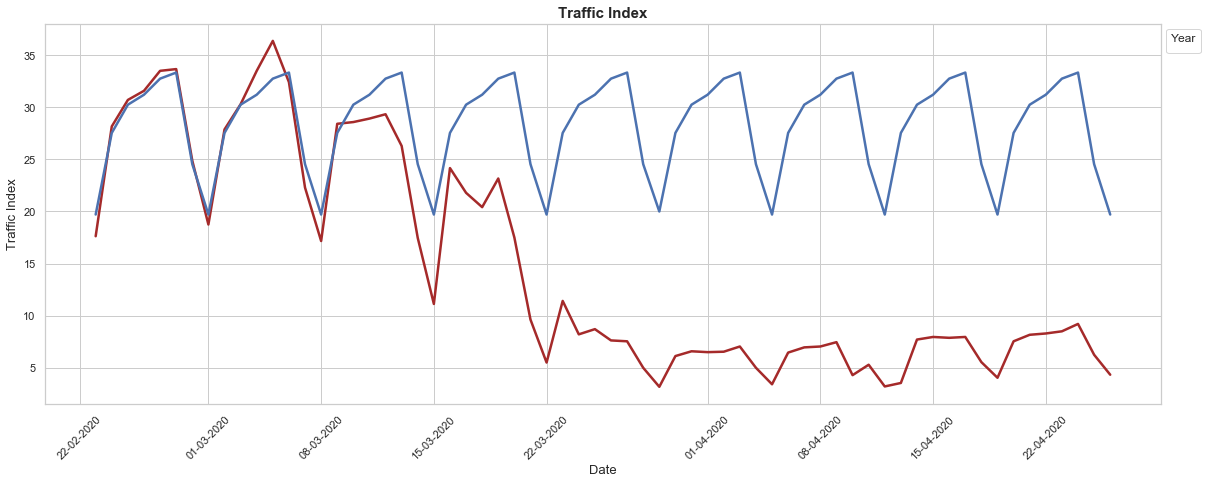

In [1819]:
#Plot traffic data

fig, ax = plt.subplots(figsize = (20,7)) 
ax = sns.lineplot(x='Date', y="Traffic Index 2020", color='brown',linewidth=2.5,data=df_20,ci= None)
ax = sns.lineplot(x='Date', y="Traffic Index 2019",linewidth=2.5,data=df_19,ci= None)
plt.xlabel("Date", fontsize= 13)
plt.ylabel("Traffic Index", fontsize= 13)
plt.title("Traffic Index", fontsize= 15, weight='bold')
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

plt.show()

### Regression Plot for NO2 and traffic data

In [2174]:
#Load data for all 32 boroughs so it is more compatible with traffic data

df = pd.read_csv('NO2_20.csv')
df.columns = ['Site', 'Species','Date','NO2','Units','Provisional or Ratified']
df.drop(['Species','Units','Provisional or Ratified'],inplace=True,axis=1)
df['Date'] = pd.to_datetime(df['Date']).dt.normalize()
df.head()

Site       Date   NO2
0  Camden 2020-02-23  42.6
1  Camden 2020-02-24  58.5
2  Camden 2020-02-25  64.8
3  Camden 2020-02-26  57.5
4  Camden 2020-02-27  56.2

In [2175]:
#Group NO2 data by dates and delete Site column
df.drop(['Site'],inplace=True,axis=1)
NO2=df.groupby('Date',sort=False)['NO2'].mean().reset_index()
NO2

Date        NO2
0  2020-02-23  22.066667
1  2020-02-24  24.048148
2  2020-02-25  28.929630
3  2020-02-26  34.359259
4  2020-02-27  39.511111
..        ...        ...
59 2020-04-22  20.277778
60 2020-04-23  28.166667
61 2020-04-24  28.329630
62 2020-04-25  16.114815
63 2020-04-26  20.811111

[64 rows x 2 columns]

In [2165]:
#Delete traffic index 2019 column and group the traffic data by date
df2 = df1.drop(['Traffic Index 2019'],inplace=False,axis=1)
traffic = df2.groupby('Date')['Traffic Index 2020'].mean().reset_index()

In [2166]:
traffic

Date  Traffic Index 2020
0  2020-02-23           17.625000
1  2020-02-24           28.166667
2  2020-02-25           30.708333
3  2020-02-26           31.583333
4  2020-02-27           33.500000
..        ...                 ...
59 2020-04-22            8.291667
60 2020-04-23            8.500000
61 2020-04-24            9.208333
62 2020-04-25            6.250000
63 2020-04-26            4.333333

[64 rows x 2 columns]

In [2167]:
trafficNO2=pd.concat([NO2,traffic],axis=1,join='inner')
trafficNO2

Date        NO2       Date  Traffic Index 2020
0  2020-02-23  22.066667 2020-02-23           17.625000
1  2020-02-24  24.048148 2020-02-24           28.166667
2  2020-02-25  28.929630 2020-02-25           30.708333
3  2020-02-26  34.359259 2020-02-26           31.583333
4  2020-02-27  39.511111 2020-02-27           33.500000
..        ...        ...        ...                 ...
59 2020-04-22  20.277778 2020-04-22            8.291667
60 2020-04-23  28.166667 2020-04-23            8.500000
61 2020-04-24  28.329630 2020-04-24            9.208333
62 2020-04-25  16.114815 2020-04-25            6.250000
63 2020-04-26  20.811111 2020-04-26            4.333333

[64 rows x 4 columns]

In [2171]:
trafficNO2.corr()

NO2  Traffic Index 2020
NO2                 1.00000             0.39649
Traffic Index 2020  0.39649             1.00000

In [2179]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(trafficNO2['Traffic Index 2020'], trafficNO2['NO2'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.3964898157393618  with a P-value of P = 0.001180930281446588


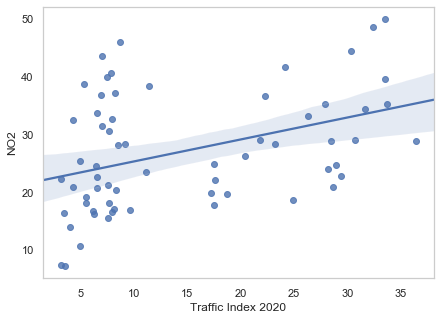

In [2178]:
plt.figure(figsize=(7,5))
sns.set_style("whitegrid", {'axes.grid' : False})
sns.regplot(x="Traffic Index 2020", y="NO2", data=trafficNO2)

### Analysis of PM2.5

In [633]:
df_PM = pd.read_csv('PM2.5.csv')
df_PM.head()

Site Species   ReadingDateTime  Value  Units Provisional or Ratified
0  CD9   PM2.5  23/02/2020 00:00    6.4  ug/m3                       P
1  CD9   PM2.5  24/02/2020 00:00    4.7  ug/m3                       P
2  CD9   PM2.5  25/02/2020 00:00    6.7  ug/m3                       P
3  CD9   PM2.5  26/02/2020 00:00    6.2  ug/m3                       P
4  CD9   PM2.5  27/02/2020 00:00    7.2  ug/m3                       P

In [634]:
df_PM.columns = ['Site', 'Species','Date','PM2.5','Units','Provisional or Ratified']
df_PM.drop(['Species','Units','Provisional or Ratified'],inplace=True,axis=1)
df_PM.head()

Site              Date  PM2.5
0  CD9  23/02/2020 00:00    6.4
1  CD9  24/02/2020 00:00    4.7
2  CD9  25/02/2020 00:00    6.7
3  CD9  26/02/2020 00:00    6.2
4  CD9  27/02/2020 00:00    7.2

In [635]:
df_PM['Date'] = pd.to_datetime(df_PM['Date']).dt.normalize()
df_PM['Date']=df_PM['Date'].dt.strftime('%d/%m/%Y')
df_PM['Date'] = df_PM['Date'].astype('datetime64[ns]')
df_PM.head()

Site       Date  PM2.5
0  CD9 2020-02-23    6.4
1  CD9 2020-02-24    4.7
2  CD9 2020-02-25    6.7
3  CD9 2020-02-26    6.2
4  CD9 2020-02-27    7.2

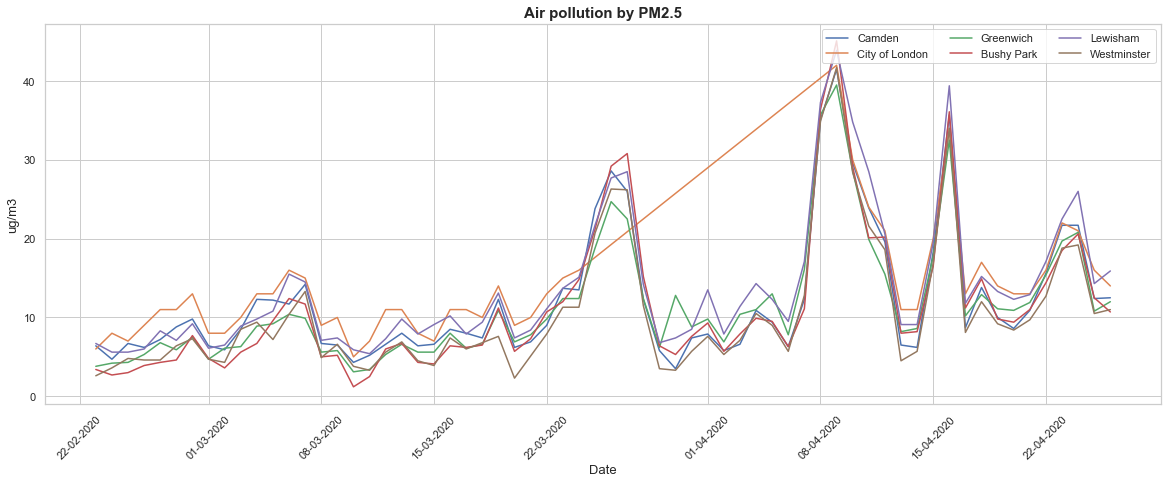

In [636]:
plt.subplots(figsize = (20,7)) 
ax4 = sns.lineplot(x='Date', y="PM2.5",hue='Site',data=df_PM, ci=None)
plt.xlabel("Date", fontsize= 13)
plt.ylabel("ug/m3", fontsize= 13)
plt.title("Air pollution by PM2.5", fontsize= 15, weight='bold')
plt.xticks(rotation=45)
ax4.xaxis.set_major_locator(mdates.AutoDateLocator())
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.legend(('Camden','City of London','Greenwich','Bushy Park','Lewisham','Westminster'), ncol=3, loc='upper right');

plt.show()

In [637]:
df_PM19 = pd.read_csv('PM2.519.csv')
df_PM19.head()

Site Species   ReadingDateTime  Value  Units Provisional or Ratified
0  BL0   PM2.5  23/02/2019 00:00   32.2  ug/m3                       R
1  BL0   PM2.5  24/02/2019 00:00   39.2  ug/m3                       R
2  BL0   PM2.5  25/02/2019 00:00   40.1  ug/m3                       R
3  BL0   PM2.5  26/02/2019 00:00   44.3  ug/m3                       R
4  BL0   PM2.5  27/02/2019 00:00   45.4  ug/m3                       R

In [638]:
df_PM19.columns = ['Site', 'Species','Date','PM2.5','Units','Provisional or Ratified']
df_PM19.drop(['Species','Units','Provisional or Ratified'],inplace=True,axis=1)
df_PM19.head()

Site              Date  PM2.5
0  BL0  23/02/2019 00:00   32.2
1  BL0  24/02/2019 00:00   39.2
2  BL0  25/02/2019 00:00   40.1
3  BL0  26/02/2019 00:00   44.3
4  BL0  27/02/2019 00:00   45.4

In [639]:
df_PM19['Date'] = pd.to_datetime(df_PM19['Date']).dt.normalize()
df_PM19['Date']=df_PM19['Date'].dt.strftime('%d/%m/%Y')
df_PM19['Date'] = df_PM19['Date'].astype('datetime64[ns]')
df_PM19.head()

Site       Date  PM2.5
0  BL0 2019-02-23   32.2
1  BL0 2019-02-24   39.2
2  BL0 2019-02-25   40.1
3  BL0 2019-02-26   44.3
4  BL0 2019-02-27   45.4

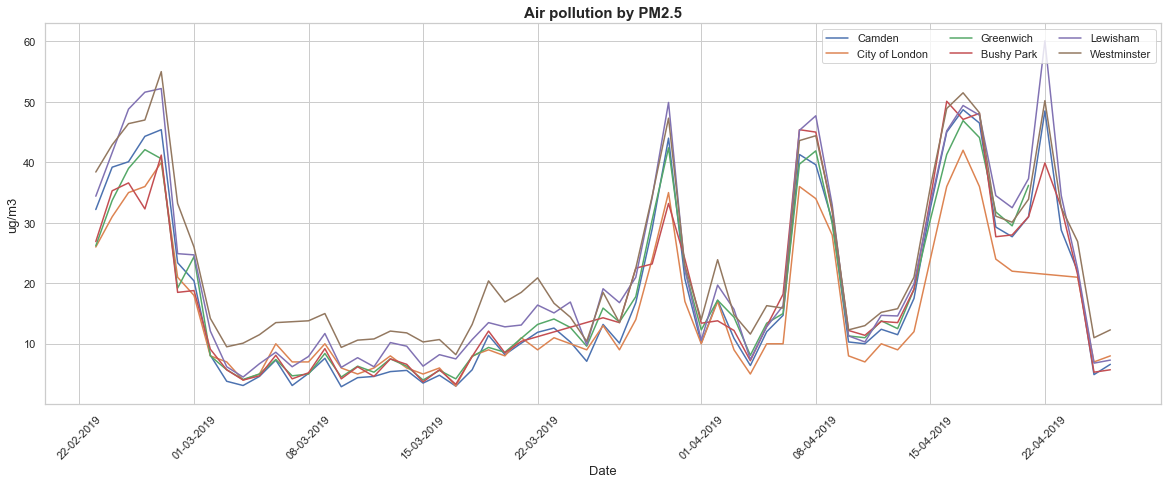

In [640]:
plt.subplots(figsize = (20,7)) 
ax4 = sns.lineplot(x='Date', y="PM2.5",hue='Site',data=df_PM19, ci=None)
plt.xlabel("Date", fontsize= 13)
plt.ylabel("ug/m3", fontsize= 13)
plt.title("Air pollution by PM2.5", fontsize= 15, weight='bold')
plt.xticks(rotation=45)
ax4.xaxis.set_major_locator(mdates.AutoDateLocator())
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.legend(('Camden','City of London','Greenwich','Bushy Park','Lewisham','Westminster'), ncol=3, loc='upper right');

plt.show()

In [1822]:
fig, axs = plt.subplots(ncols=2,figsize=(30,10))
ax4 = sns.lineplot(x='Date', y='PM2.5',hue='Site',data=df_PM, ax=axs[0])
ax5 = sns.lineplot(x='Date', y='PM2.5',hue='Site',data=df_PM19, ax=axs[1])
ax4.set_title('PM2.5 in 2020',fontsize=15,weight='bold')
ax4.xaxis.set_major_locator(mdates.AutoDateLocator())
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax4.set(ylim=(0, 70))
ax4.legend(('Camden','City of London','Greenwich','Bushy Park','Lewisham','Westminster'), ncol=3, loc='upper right')
ax5.set_title('PM2.5 in 2019',fontsize=15,weight='bold')
ax5.xaxis.set_major_locator(mdates.AutoDateLocator())
ax5.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax5.set(ylim=(0, 70))
ax5.legend(('Camden','City of London','Greenwich','Bushy Park','Lewisham','Westminster'), ncol=3, loc='upper right')

In [857]:
df_PM.head()
PM=df_PM.groupby('Date',sort=False)['PM2.5'].mean().reset_index()
df5=pd.concat([PM,df3],axis=1,join='inner')
df5

Date      PM2.5       Date  Traffic Index 2020
0  2020-02-23   4.816667 2020-02-23           17.625000
1  2020-02-24   4.800000 2020-02-24           28.166667
2  2020-02-25   5.233333 2020-02-25           30.708333
3  2020-02-26   5.833333 2020-02-26           31.583333
4  2020-02-27   7.033333 2020-02-27           33.500000
..        ...        ...        ...                 ...
59 2020-04-22  15.200000 2020-04-22            8.291667
60 2020-04-23  20.533333 2020-04-23            8.500000
61 2020-04-24  21.550000 2020-04-24            9.208333
62 2020-04-25  12.750000 2020-04-25            6.250000
63 2020-04-26  12.683333 2020-04-26            4.333333

[64 rows x 4 columns]

## Analysis of London boroughs

In [894]:
#Install folium library

!conda install --channel conda-forge geopandas geoplot geopy --yes
from geopy.geocoders import Nominatim 
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium 

print('Libraries imported.')

Solving environment: - 
  - anaconda/osx-64::openssl-1.1.1d-h1de35cc_2
  - defaults/osx-64::openssl-1.1.1d-h1de35ccdone

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - geopandas
    - geoplot
    - geopy


The following packages will be UPDATED:

  conda                        anaconda::conda-4.8.3-py37_0 --> conda-forge::conda-4.8.3-py37hc8dfbb8_1


Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: / 
  - anaconda/osx-64::openssl-1.1.1d-h1de35cc_2
  - defaults/osx-64::openssl-1.1.1d-h1de35ccdone

# All requested packages already installed.

Libraries imported.


#### Use geopy library to get the latitude and longitude values of London

In [905]:
#folium map with london boroughs
address = 'London, UK'

geolocator = Nominatim(user_agent="explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


#### Extract latitude and longitude values of London boroughs and turn to data frame

In [1336]:
with open('london_boroughs.json') as json_data:
    ldn_data = json.load(json_data)
boroughs_data = ldn_data['features']

Tranform the data into a *pandas* dataframe

In [1337]:
# define the dataframe columns
column_names = ['Borough', 'Latitude', 'Longitude'] 

# instantiate the dataframe
boroughs = pd.DataFrame(columns=column_names)
boroughs

Empty DataFrame
Columns: [Borough, Latitude, Longitude]
Index: []

Then loop through the data and fill the dataframe one row at a time

In [1338]:
for data in boroughs_data:
    borough = data['properties']['name'] 
        
    borough_latlon = data['geometry']['coordinates'][0][0][0]
    borough_lat = borough_latlon[1]
    borough_lon = borough_latlon[0]
    
    boroughs = boroughs.append({'Borough': borough,
                                'Latitude': borough_lat,
                                'Longitude': borough_lon}, ignore_index=True)

In [2181]:
boroughs.head()

Borough   Latitude  Longitude
0  Kingston upon Thames  51.329011  -0.330679
1               Croydon  51.318638  -0.064021
2               Bromley  51.299599   0.012131
3              Hounslow  51.488702  -0.244562
4                Ealing  51.534084  -0.411833

#### Analysis of London energy consumption and later link with PM data and chropleth map

In [2074]:
#Loading data and cleaning
energy = pd.read_csv('energycon.csv')
energy.head()

Area  LEGGI_Year    Sector         Fuel Data_Year  \
0  Barking and Dagenham        2017  Domestic  Electricity      2017   
1                Barnet        2017  Domestic  Electricity      2017   
2                Bexley        2017  Domestic  Electricity      2017   
3                 Brent        2017  Domestic  Electricity      2017   
4               Bromley        2017  Domestic  Electricity      2017   

           kWh  
0  261584448.5  
1    618659527  
2  371815290.2  
3  424582525.8  
4  547354739.7

In [2075]:
energy.columns = ['Borough', 'Year','Sector','Fuel','Datayear','Energy consumption']
energy.drop(['Year','Datayear'],inplace=True,axis=1)
energy.head()

Borough    Sector         Fuel Energy consumption
0  Barking and Dagenham  Domestic  Electricity        261584448.5
1                Barnet  Domestic  Electricity          618659527
2                Bexley  Domestic  Electricity        371815290.2
3                 Brent  Domestic  Electricity        424582525.8
4               Bromley  Domestic  Electricity        547354739.7

In [2076]:
energy['Energy consumption']=pd.to_numeric(energy['Energy consumption'],errors='coerce')
energy.dtypes

Borough                object
Sector                 object
Fuel                   object
Energy consumption    float64
dtype: object

In [2077]:
group_data = energy.groupby(['Borough','Sector','Fuel'])['Energy consumption'].sum().reset_index()
group_data

Borough     Sector               Fuel  Energy consumption
0    Barking and Dagenham   Domestic               Coal        4.089429e+07
1    Barking and Dagenham   Domestic        Electricity        2.184008e+09
2    Barking and Dagenham   Domestic                Gas        6.248486e+09
3    Barking and Dagenham   Domestic                Oil        2.013865e+07
4    Barking and Dagenham   Domestic              Total        8.493527e+09
..                    ...        ...                ...                 ...
660           Westminster  Transport    Railways Diesel        1.022879e+08
661           Westminster  Transport  Railways Electric        1.150379e+09
662           Westminster  Transport     Road Transport        8.280425e+09
663           Westminster  Transport           Shipping        3.384939e+07
664           Westminster  Transport              Total        9.566941e+09

[665 rows x 4 columns]

In [2078]:
grouped1 = energy.groupby(['Sector'])['Energy consumption'].sum().reset_index()
grouped1.columns=['Sector','Total']
grouped1

Sector         Total
0                   Domestic  1.782104e+12
1  Industrial and Commercial  1.974874e+12
2                      Total  2.199461e+12
3                  Transport  1.044250e+12

In [2079]:
grouped1.drop(df.index[2],inplace=True)

In [2080]:
#Energy consumption by fuel

grouped2 = energy.groupby(['Fuel'])['Energy consumption'].sum().reset_index()
grouped2.columns=['Fuel','Total']
grouped2.drop(df.index[10],inplace=True)
grouped2

Fuel         Total
0               Aviation  5.977764e+10
1                   Coal  2.870817e+09
2            Electricity  6.123171e+11
3   Electricity w/o rail  3.943707e+11
4                    Gas  1.019284e+12
5                    Oil  3.705085e+10
6        Railways Diesel  6.075512e+09
7      Railways Electric  3.419647e+10
8         Road Transport  4.208396e+11
9               Shipping  1.235766e+09
11  Waste and Renewables  1.359337e+10

In [2081]:
#Energy consumption by borough

grouped3 = energy.groupby('Borough')['Energy consumption'].sum().reset_index()
grouped3.columns=['Borough','Total']
grouped3

Borough         Total
0     Barking and Dagenham  6.173005e+10
1                   Barnet  1.411286e+11
2                   Bexley  9.470704e+10
3                    Brent  1.090220e+11
4                  Bromley  1.161188e+11
5                   Camden  1.302935e+11
6           City of London  1.002506e+11
7                  Croydon  1.225945e+11
8                   Ealing  1.331754e+11
9                  Enfield  1.214031e+11
10               Greenwich  9.240840e+10
11                 Hackney  7.179500e+10
12  Hammersmith and Fulham  7.999784e+10
13                Haringey  7.697064e+10
14                  Harrow  7.706216e+10
15                Havering  9.925708e+10
16              Hillingdon  2.253135e+11
17                Hounslow  1.253650e+11
18               Islington  8.530635e+10
19  Kensington and Chelsea  1.036132e+11
20                Kingston  6.243147e+10
21                 Lambeth  1.044321e+11
22                Lewisham  7.784685e+10
23                  London  3.486981e+12
24                  Merton  7.162844e+10
25                  Newham  1.221249e+11
26               Redbridge  8.732332e+10
27                Richmond  7.915918e+10
28               Southwark  1.159543e+11
29                  Sutton  6.412058e+10
30           Tower Hamlets  1.420687e+11
31           Unapportioned  3.566319e+09
32          Waltham Forest  7.718701e+10
33              Wandsworth  1.009030e+11
34             Westminster  2.374486e+11

In [2182]:
grouped3['Borough'] = grouped3['Borough'].replace(['Kingston', 'Richmond'], ['Kingston upon Thames','Richmond upon Thames'])
grouped3.head()

Borough         Total
0  Barking and Dagenham  6.173005e+10
1                Barnet  1.411286e+11
2                Bexley  9.470704e+10
3                 Brent  1.090220e+11
4               Bromley  1.161188e+11

In [2083]:
#Delete rows that are not relevant

grouped3.drop(df.index[23],inplace=True)
grouped3.drop(df.index[31],inplace=True)
grouped3

Borough         Total
0     Barking and Dagenham  6.173005e+10
1                   Barnet  1.411286e+11
2                   Bexley  9.470704e+10
3                    Brent  1.090220e+11
4                  Bromley  1.161188e+11
5                   Camden  1.302935e+11
6           City of London  1.002506e+11
7                  Croydon  1.225945e+11
8                   Ealing  1.331754e+11
9                  Enfield  1.214031e+11
10               Greenwich  9.240840e+10
11                 Hackney  7.179500e+10
12  Hammersmith and Fulham  7.999784e+10
13                Haringey  7.697064e+10
14                  Harrow  7.706216e+10
15                Havering  9.925708e+10
16              Hillingdon  2.253135e+11
17                Hounslow  1.253650e+11
18               Islington  8.530635e+10
19  Kensington and Chelsea  1.036132e+11
20    Kingston upon Thames  6.243147e+10
21                 Lambeth  1.044321e+11
22                Lewisham  7.784685e+10
24                  Merton  7.162844e+10
25                  Newham  1.221249e+11
26               Redbridge  8.732332e+10
27    Richmond upon Thames  7.915918e+10
28               Southwark  1.159543e+11
29                  Sutton  6.412058e+10
30           Tower Hamlets  1.420687e+11
32          Waltham Forest  7.718701e+10
33              Wandsworth  1.009030e+11
34             Westminster  2.374486e+11

#### Analysis of London borough profiles

In [1944]:
#Load London borough profile
profile = pd.read_csv('london-profiles.csv',encoding= 'unicode_escape')
profile.head()

Code             Area_name Inner/_Outer_London  \
0  E09000001        City of London        Inner London   
1  E09000002  Barking and Dagenham        Outer London   
2  E09000003                Barnet        Outer London   
3  E09000004                Bexley        Outer London   
4  E09000005                 Brent        Outer London   

   GLA_Population_Estimate_2017 GLA_Household_Estimate_2017  \
0                          8800                        5326   
1                        209000                       78188   
2                        389600                      151423   
3                        244300                       97736   
4                        332100                      121048   

  Inland_Area_(Hectares) Population_density_(per_hectare)_2017  \
0                    290                                  30.3   
1                  3,611                                  57.9   
2                  8,675                                  44.9   
3                  6,058                                  40.3   
4                  4,323                                  76.8   

   Average_Age,_2017  Proportion_of_population_aged_0-15,_2015  \
0               43.2                                      11.4   
1               32.9                                      27.2   
2               37.3                                      21.1   
3               39.0                                      20.6   
4               35.6                                      20.9   

   Proportion_of_population_of_working-age,_2015  ...  \
0                                           73.1  ...   
1                                           63.1  ...   
2                                           64.9  ...   
3                                           62.9  ...   
4                                           67.8  ...   

   Happiness_score_2011-14_(out_of_10) Anxiety_score_2011-14_(out_of_10)  \
0                                  6.0                               5.6   
1                                  7.1                               3.1   
2                                  7.4                               2.8   
3                                  7.2                               3.3   
4                                  7.2                               2.9   

  Childhood_Obesity_Prevalance_(%)_2015/16 People_aged_17+_with_diabetes_(%)  \
0                                      NaN                               2.6   
1                                     28.5                               7.3   
2                                     20.7                               6.0   
3                                     22.7                               6.9   
4                                     24.3                               7.9   

  Mortality_rate_from_causes_considered_preventable_2012/14  \
0                                                129          
1                                                228          
2                                                134          
3                                                164          
4                                                169          

  Political_control_in_council  \
0                            .   
1                          Lab   
2                         Cons   
3                         Cons   
4                          Lab   

  Proportion_of_seats_won_by_Conservatives_in_2014_election  \
0                                                  .          
1                                                  0          
2                                               50.8          
3                                               71.4          
4                                                9.5          

  Proportion_of_seats_won_by_Labour_in_2014_election  \
0                                                  .   
1                                                100   
2                                                  .   
3                 

In [1945]:
profile.dropna(axis = 0, how = 'all', inplace = True)
profile.tail()

Code       Area_name Inner/_Outer_London  \
33  E13000001    Inner London                 NaN   
34  E13000002    Outer London                 NaN   
35  E12000007          London                 NaN   
36  E92000001         England                 NaN   
37  K02000001  United Kingdom                 NaN   

    GLA_Population_Estimate_2017 GLA_Household_Estimate_2017  \
33                       3535700                     1522541   
34                       5299800                     2079422   
35                       8835500                     3601963   
36                      55609600                           .   
37                      65999100                           .   

   Inland_Area_(Hectares) Population_density_(per_hectare)_2017  \
33                 31,929                                 110.7   
34                125,424                                  42.3   
35                157,215                                  56.2   
36             13,025,967                                     .   
37                      .                                     .   

    Average_Age,_2017  Proportion_of_population_aged_0-15,_2015  \
33               34.7                                      38.5   
34               36.9                                      13.8   
35               36.0                                      13.9   
36               40.0                                      19.0   
37               40.1                                      18.8   

    Proportion_of_population_of_working-age,_2015  ...  \
33                                           54.7  ...   
34                                           71.7  ...   
35                                           73.6  ...   
36                                           63.3  ...   
37                                           63.3  ...   

    Happiness_score_2011-14_(out_of_10) Anxiety_score_2011-14_(out_of_10)  \
33                                  7.2                               3.4   
34                                  7.3                               3.2   
35                                  7.2                               3.3   
36                                  7.3                               3.0   
37                                  7.3                               3.0   

   Childhood_Obesity_Prevalance_(%)_2015/16 People_aged_17+_with_diabetes_(%)  \
33                                        -                               5.3   
34                                        -                               6.5   
35                                     23.2                               6.0   
36                                     19.8                               6.2   
37                                        -                               NaN   

   Mortality_rate_from_causes_considered_preventable_2012/14  \
33                                                  .          
34                                                  .          
35                                                169          
36                                                183          
37                                                  .          

   Political_control_in_council  \
33                            .   
34                            .   
35                            .   
36                            .   
37                            .   

   Proportion_of_seats_won_by_Conservatives_in_2014_election  \
33                                               23.4          
34                                               39.2          
35                                               33.1          
36                                                  .          
37                                                  .          

   Proportion_of_seats_won_by_Labour_in_2014_election  \
33                                               69.7   
34                                               49.4   
35                                              

In [1946]:
#Drop rows that are not London boroughs
profile.drop(df.index[[33,34,35,36,37]], inplace=True)
profile.tail()

Code       Area_name Inner/_Outer_London  \
28  E09000029          Sutton        Outer London   
29  E09000030   Tower Hamlets        Inner London   
30  E09000031  Waltham Forest        Outer London   
31  E09000032      Wandsworth        Inner London   
32  E09000033     Westminster        Inner London   

    GLA_Population_Estimate_2017 GLA_Household_Estimate_2017  \
28                        202600                       85243   
29                        304000                      123720   
30                        276200                      105981   
31                        321000                      138149   
32                        242100                      118975   

   Inland_Area_(Hectares) Population_density_(per_hectare)_2017  \
28                  4,385                                  46.2   
29                  1,978                                 153.7   
30                  3,881                                  71.2   
31                  3,426                                  93.7   
32                  2,149                                 112.7   

    Average_Age,_2017  Proportion_of_population_aged_0-15,_2015  \
28               38.9                                      20.7   
29               31.4                                      20.1   
30               35.1                                      21.8   
31               35.0                                      17.8   
32               37.7                                      15.9   

    Proportion_of_population_of_working-age,_2015  ...  \
28                                           64.3  ...   
29                                           73.9  ...   
30                                           67.9  ...   
31                                           72.8  ...   
32                                           72.3  ...   

    Happiness_score_2011-14_(out_of_10) Anxiety_score_2011-14_(out_of_10)  \
28                                  7.3                               3.2   
29                                  7.2                               3.3   
30                                  7.1                               3.1   
31                                  7.4                               3.6   
32                                  7.1                               3.4   

   Childhood_Obesity_Prevalance_(%)_2015/16 People_aged_17+_with_diabetes_(%)  \
28                                     18.4                               5.9   
29                                     27.1                               6.6   
30                                     26.3                               6.4   
31                                     19.3                               4.2   
32                                     24.9                               4.4   

   Mortality_rate_from_causes_considered_preventable_2012/14  \
28                                                163          
29                                                239          
30                                                185          
31                                                177          
32                                                162          

   Political_control_in_council  \
28                      Lib Dem   
29          Tower Hamlets First   
30                          Lab   
31                         Cons   
32                         Cons   

   Proportion_of_seats_won_by_Conservatives_in_2014_election  \
28                                               16.7          
29                                               11.1          
30                                               26.7          
31                                               68.3          
32                                               73.3          

   Proportion_of_seats_won_by_Labour_in_2014_election  \
28                                                  0   
29                                               48.9   
30                                              

In [2106]:
# Get only columns that can affect air pollution
profile1 = profile[['Area_name', 'GLA_Population_Estimate_2017','%_of_area_that_is_Greenspace,_2005','Number_of_cars,_(2011_Census)','Number_of_active_businesses,_2015']]
profile1.head()

Area_name  GLA_Population_Estimate_2017  \
0        City of London                          8800   
1  Barking and Dagenham                        209000   
2                Barnet                        389600   
3                Bexley                        244300   
4                 Brent                        332100   

  %_of_area_that_is_Greenspace,_2005  Number_of_cars,_(2011_Census)  \
0                                4.8                           1692   
1                               33.6                          56966   
2                               41.3                         144717   
3                               31.7                         108507   
4                               21.9                          87802   

   Number_of_active_businesses,_2015  
0                              26130  
1                               6560  
2                              26190  
3                               9075  
4                              15745

In [2107]:
#Rename columns
profile1.columns=['Borough','Population estimate 2017','%Green space area 2005','Number of cars 2011','Number of active business 2015']
profile1.head()

Borough  Population estimate 2017 %Green space area 2005  \
0        City of London                      8800                    4.8   
1  Barking and Dagenham                    209000                   33.6   
2                Barnet                    389600                   41.3   
3                Bexley                    244300                   31.7   
4                 Brent                    332100                   21.9   

   Number of cars 2011  Number of active business 2015  
0                 1692                           26130  
1                56966                            6560  
2               144717                           26190  
3               108507                            9075  
4                87802                           15745

In [2108]:
profile2=profile1.merge(grouped3, how='inner', on=['Borough'])
profile2.columns=['Borough','Population estimate 2017','%Green space area 2005','Number of cars 2011','Number of active business 2015','Energy consumption 2017']
profile2.head()

Borough  Population estimate 2017 %Green space area 2005  \
0        City of London                      8800                    4.8   
1  Barking and Dagenham                    209000                   33.6   
2                Barnet                    389600                   41.3   
3                Bexley                    244300                   31.7   
4                 Brent                    332100                   21.9   

   Number of cars 2011  Number of active business 2015  \
0                 1692                           26130   
1                56966                            6560   
2               144717                           26190   
3               108507                            9075   
4                87802                           15745   

   Energy consumption 2017  
0             1.002506e+11  
1             6.173005e+10  
2             1.411286e+11  
3             9.470704e+10  
4             1.090220e+11

In [2109]:
merged_clustering = profile2.drop(['Borough'],axis=1)
merged_clustering.head()

Population estimate 2017 %Green space area 2005  Number of cars 2011  \
0                      8800                    4.8                 1692   
1                    209000                   33.6                56966   
2                    389600                   41.3               144717   
3                    244300                   31.7               108507   
4                    332100                   21.9                87802   

   Number of active business 2015  Energy consumption 2017  
0                           26130             1.002506e+11  
1                            6560             6.173005e+10  
2                           26190             1.411286e+11  
3                            9075             9.470704e+10  
4                           15745             1.090220e+11

### Machine Learning - K-means clustering

In [2258]:
#Standardise data before clustering

from sklearn.preprocessing import StandardScaler
X = merged_clustering.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-2.13244541e+00, -2.30612361e+00,  1.11751732e+00,
        -1.56226828e-01,  1.22794168e+00],
       [ 1.75316054e-01, -6.93572126e-01, -1.13092140e+00,
        -1.13998679e+00, -1.20338285e+00],
       [ 7.92321724e-01,  1.86645619e+00,  1.12441084e+00,
         8.87736700e-01,  4.17500172e-01],
       [ 2.30679019e-02,  8.10073635e-01, -8.41967725e-01,
        -2.97801850e-01,  1.22794168e+00],
       [-7.62212041e-01,  2.06030534e-01, -7.56373098e-02,
         6.77814365e-02,  1.22794168e+00],
       [ 2.11447673e+00,  2.13459239e+00, -8.13819156e-02,
         2.49022742e-01,  4.17500172e-01],
       [-5.29833283e-01, -9.95958349e-01,  1.72127539e+00,
         6.11026203e-01,  4.17500172e-01],
       [ 4.55773177e-01,  1.73027298e+00, -9.91901936e-02,
         4.14402624e-01,  4.17500172e-01],
       [-4.10365833e-02,  9.36629490e-01,  2.63868893e-01,
         6.84623766e-01,  4.17500172e-01],
       [ 1.13688333e+00,  1.13524458e+00, -2.84740961e-01,
         3.83976952e-01

In [2259]:
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, random_state=0)
k_means.fit(X)
labels = k_means.labels_
inertia= k_means.inertia_
print(labels)
print(inertia)

[3 0 2 3 3 2 2 2 2 2 3 0 0 0 0 3 1 2 0 3 0 3 0 0 2 3 0 2 0 2 0 3 1]
1.8469008502084322e+21


In [2260]:
#Find best k by calculating degree of inertia

no_of_clusters = range(1,20)
inertia=[]

for f in no_of_clusters:
    kmeans = KMeans(n_clusters = f,random_state=2)
    kmeans = kmeans.fit(X)
    u= kmeans.inertia_
    inertia.append(u)
    print('The inertia for:',f,"clusters is:",u)

The inertia for: 1 clusters is: 5.059657976264043e+22
The inertia for: 2 clusters is: 1.73234768720483e+22
The inertia for: 3 clusters is: 4.517982058591623e+21
The inertia for: 4 clusters is: 1.8469008502084322e+21
The inertia for: 5 clusters is: 1.2309323711791644e+21
The inertia for: 6 clusters is: 6.573199231940226e+20
The inertia for: 7 clusters is: 4.3959450484744376e+20
The inertia for: 8 clusters is: 3.4201731817131567e+20
The inertia for: 9 clusters is: 2.683870437738984e+20
The inertia for: 10 clusters is: 1.9438499340130664e+20
The inertia for: 11 clusters is: 1.3436592151172193e+20
The inertia for: 12 clusters is: 8.190652989124323e+19
The inertia for: 13 clusters is: 4.7647284706467635e+19
The inertia for: 14 clusters is: 3.0985092022963503e+19
The inertia for: 15 clusters is: 2.2697417565384655e+19
The inertia for: 16 clusters is: 1.5571243982944915e+19
The inertia for: 17 clusters is: 1.1418797003702995e+19
The inertia for: 18 clusters is: 8.644871397396814e+18
The inert

In [2261]:
#Plot k and the degree of inertia/ Elbow method

fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title('Inertia per k/Elbow Method',fontsize=13,weight='bold')

Text(0.5, 1.0, 'Inertia per k/Elbow Method')

In [2146]:
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, random_state=0)
k_means.fit(X)
labels = k_means.labels_
inertia= k_means.inertia_
print(labels)
print(inertia)

[3 0 2 3 3 2 2 2 2 2 3 0 0 0 0 3 1 2 0 3 0 3 0 0 2 3 0 2 0 2 0 3 1]
1.8469008502084322e+21


#### Insert labels to data frame

In [2147]:
merged_clustering['Cluster'] = labels
merged_clustering.head()

Population estimate 2017 %Green space area 2005  Number of cars 2011  \
0                      8800                    4.8                 1692   
1                    209000                   33.6                56966   
2                    389600                   41.3               144717   
3                    244300                   31.7               108507   
4                    332100                   21.9                87802   

   Number of active business 2015  Energy consumption 2017  Cluster  
0                           26130             1.002506e+11        3  
1                            6560             6.173005e+10        0  
2                           26190             1.411286e+11        2  
3                            9075             9.470704e+10        3  
4                           15745             1.090220e+11        3

In [2116]:
profile2['Cluster'] = labels
profile2.head()

Borough  Population estimate 2017 %Green space area 2005  \
0        City of London                      8800                    4.8   
1  Barking and Dagenham                    209000                   33.6   
2                Barnet                    389600                   41.3   
3                Bexley                    244300                   31.7   
4                 Brent                    332100                   21.9   

   Number of cars 2011  Number of active business 2015  \
0                 1692                           26130   
1                56966                            6560   
2               144717                           26190   
3               108507                            9075   
4                87802                           15745   

   Energy consumption 2017  Cluster  
0             1.002506e+11        3  
1             6.173005e+10        0  
2             1.411286e+11        2  
3             9.470704e+10        3  
4             1.090220e+11        3

In [2117]:
mergedlocation = profile2.merge(boroughs, how = 'inner', on = ['Borough'])
mergedlocation.head()

Borough  Population estimate 2017 %Green space area 2005  \
0        City of London                      8800                    4.8   
1  Barking and Dagenham                    209000                   33.6   
2                Barnet                    389600                   41.3   
3                Bexley                    244300                   31.7   
4                 Brent                    332100                   21.9   

   Number of cars 2011  Number of active business 2015  \
0                 1692                           26130   
1                56966                            6560   
2               144717                           26190   
3               108507                            9075   
4                87802                           15745   

   Energy consumption 2017  Cluster   Latitude  Longitude  
0             1.002506e+11        3  51.510755  -0.111574  
1             6.173005e+10        0  51.529370   0.073166  
2             1.411286e+11        2  51.670167  -0.199896  
3             9.470704e+10        3  51.511445   0.120211  
4             1.090220e+11        3  51.527654  -0.196569

In [2118]:
mergedlocation.groupby('Cluster').mean()

Population estimate 2017  Number of cars 2011  \
Cluster                                                  
0                   232758.333333         67932.083333   
1                   271550.000000         85648.000000   
2                   326650.000000         97693.400000   
3                   248077.777778         77888.777778   

         Number of active business 2015  Energy consumption 2017   Latitude  \
Cluster                                                                       
0                          12872.083333             7.376963e+10  51.495297   
1                          34445.000000             2.313810e+11  51.549332   
2                          18191.000000             1.270227e+11  51.511829   
3                          15116.111111             9.910187e+10  51.502856   

         Longitude  
Cluster             
0        -0.155472  
1        -0.277038  
2        -0.126922  
3        -0.057831

### Create map of London and add clusters

In [2119]:
import matplotlib.cm as cm
import matplotlib.colors as colors

map_ldn = folium.Map(location=[latitude, longitude], zoom_start=10)


# create map of clusters

ys = [i + x + (i*x)**2 for i in range(clusterNum)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mergedlocation['Latitude'], mergedlocation['Longitude'], mergedlocation['Borough'], mergedlocation['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_ldn)

map_ldn

#### Load PM10 data to create a choropleth map

In [2041]:
PM10 = pd.read_csv('PM10_19.csv')
PM10.head()

Site Species   ReadingDateTime  Value  \
0  Barking and Dagenham    PM10  01/01/2019 00:00    7.3   
1  Barking and Dagenham    PM10  02/01/2019 00:00    9.7   
2  Barking and Dagenham    PM10  03/01/2019 00:00   11.2   
3  Barking and Dagenham    PM10  04/01/2019 00:00   23.0   
4  Barking and Dagenham    PM10  05/01/2019 00:00   17.1   

                           Units Provisional or Ratified  
0  ug m-3 reference equiv by VCM                       P  
1  ug m-3 reference equiv by VCM                       P  
2  ug m-3 reference equiv by VCM                       P  
3  ug m-3 reference equiv by VCM                       P  
4  ug m-3 reference equiv by VCM                       P

In [2042]:
PM10.columns = ['Borough', 'Species','Date','PM10','Units','Provisional or Ratified']
PM10.drop(['Species','Units','Provisional or Ratified'],inplace=True,axis=1)
PM10.head()

Borough              Date  PM10
0  Barking and Dagenham  01/01/2019 00:00   7.3
1  Barking and Dagenham  02/01/2019 00:00   9.7
2  Barking and Dagenham  03/01/2019 00:00  11.2
3  Barking and Dagenham  04/01/2019 00:00  23.0
4  Barking and Dagenham  05/01/2019 00:00  17.1

In [2043]:
sortPM10=PM10.groupby('Borough')['PM10'].mean().reset_index()
sortPM10

Borough       PM10
0     Barking and Dagenham  17.300000
1                   Barnet  15.021508
2                   Bexley  18.574203
3                    Brent  26.300000
4                  Bromley  14.090782
5                   Camden  21.476836
6           City of London  21.586350
7                  Croydon  20.591667
8                   Ealing  17.899405
9                  Enfield  19.034185
10               Greenwich  19.893064
11                 Hackney  21.707740
12  Hammersmith and Fulham  17.527011
13                Haringey  19.440346
14                  Harrow  17.315537
15                Havering  20.585873
16              Hillingdon  15.032102
17                Hounslow  25.599150
18               Islington  20.591940
19  Kensington and Chelsea  14.497802
20    Kingston upon Thames  26.450276
21                 Lambeth  25.353261
22                Lewisham  14.671703
23                  Merton  28.085960
24                  Newham  22.201117
25               Redbridge  19.080119
26    Richmond upon Thames  16.302833
27               Southwark  19.654212
28                  Sutton  17.173913
29           Tower Hamlets  14.220253
30          Waltham Forest  16.387692
31              Wandsworth  23.263456
32             Westminster  22.260920

In [2049]:
PM10location= pd.merge(boroughs, sortPM10, how='outer', on=['Borough'])
PM10location

Borough   Latitude  Longitude       PM10
0     Kingston upon Thames  51.329011  -0.330679  26.450276
1                  Croydon  51.318638  -0.064021  20.591667
2                  Bromley  51.299599   0.012131  14.090782
3                 Hounslow  51.488702  -0.244562  25.599150
4                   Ealing  51.534084  -0.411833  17.899405
5                 Havering  51.512186   0.158693  20.585873
6               Hillingdon  51.613180  -0.404072  15.032102
7                   Harrow  51.613180  -0.404072  17.315537
8                    Brent  51.527654  -0.196569  26.300000
9                   Barnet  51.670167  -0.199896  15.021508
10                 Lambeth  51.485049  -0.128456  25.353261
11               Southwark  51.508441  -0.108925  19.654212
12                Lewisham  51.493055  -0.032413  14.671703
13               Greenwich  51.485546  -0.024847  19.893064
14                  Bexley  51.511445   0.120211  18.574203
15                 Enfield  51.691873  -0.105805  19.034185
16          Waltham Forest  51.608223   0.019242  16.387692
17               Redbridge  51.544129   0.069367  19.080119
18                  Sutton  51.321511  -0.156569  17.173913
19    Richmond upon Thames  51.465407  -0.321735  16.302833
20                  Merton  51.390935  -0.134320  28.085960
21              Wandsworth  51.471521  -0.223425  23.263456
22  Hammersmith and Fulham  51.488702  -0.244562  17.527011
23  Kensington and Chelsea  51.477419  -0.183881  14.497802
24             Westminster  51.485484  -0.150004  22.260920
25                  Camden  51.569120  -0.142416  21.476836
26           Tower Hamlets  51.507843  -0.079379  14.220253
27               Islington  51.556859  -0.138394  20.591940
28                 Hackney  51.573652  -0.097665  21.707740
29                Haringey  51.573652  -0.097665  19.440346
30                  Newham  51.529824   0.075487  22.201117
31    Barking and Dagenham  51.529370   0.073166  17.300000
32          City of London  51.510755  -0.111574  21.586350

#### Add choropleth map to clustered map

In [2280]:
map_ldn = folium.Map(location=[latitude, longitude], zoom_start=10)

map_ldn.choropleth(
    geo_data=ldn_geo,
    data=PM10location,
    columns=['Borough', 'PM10'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.3,
    legend_name='PM10 concentration')

# create map of clusters

ys = [i + x + (i*x)**2 for i in range(clusterNum)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, borough, cluster in zip(mergedlocation['Latitude'], mergedlocation['Longitude'], mergedlocation['Borough'], mergedlocation['Cluster']):
    label = folium.Popup(str(borough) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_ldn)

map_ldn

#### Analysis of each cluster

In [2263]:
mergedlocation.loc[mergedlocation['Cluster'] == 0, mergedlocation.columns[[0] + list(range(1, mergedlocation.shape[1]))]]

Borough  Population estimate 2017 %Green space area 2005  \
1     Barking and Dagenham                    209000                   33.6   
11                 Hackney                    274300                   23.2   
12  Hammersmith and Fulham                    185300                   19.1   
13                Haringey                    278000                   25.5   
14                  Harrow                    252300                   34.6   
18               Islington                    231200                   12.4   
20    Kingston upon Thames                    175400                   36.4   
22                Lewisham                    303400                   22.5   
23                  Merton                    208100                   34.6   
26    Richmond upon Thames                    197300                   50.8   
28                  Sutton                    202600                     32   
30          Waltham Forest                    276200                   31.4   

    Number of cars 2011  Number of active business 2015  \
1                 56966                            6560   
11                41800                           18510   
12                43843                           14095   
13                61515                           12675   
14               100326                           15155   
18                38629                           22110   
20                70421                            8970   
22                76507                           10405   
23                72777                           12070   
26                84918                           14185   
28                91266                            8710   
30                76217                           11020   

    Energy consumption 2017  Cluster   Latitude  Longitude  
1              6.173005e+10        0  51.529370   0.073166  
11             7.179500e+10        0  51.573652  -0.097665  
12             7.999784e+10        0  51.488702  -0.244562  
13             7.697064e+10        0  51.573652  -0.097665  
14             7.706216e+10        0  51.613180  -0.404072  
18             8.530635e+10        0  51.556859  -0.138394  
20             6.243147e+10        0  51.329011  -0.330679  
22             7.784685e+10        0  51.493055  -0.032413  
23             7.162844e+10        0  51.390935  -0.134320  
26             7.915918e+10        0  51.465407  -0.321735  
28             6.412058e+10        0  51.321511  -0.156569  
30             7.718701e+10        0  51.608223   0.019242

In [2267]:
mergedlocation.loc[mergedlocation['Cluster'] == 1, mergedlocation.columns[[0] + list(range(1, mergedlocation.shape[1]))]]

Borough  Population estimate 2017 %Green space area 2005  \
16   Hillingdon                    301000                   49.2   
32  Westminster                    242100                   38.2   

    Number of cars 2011  Number of active business 2015  \
16               122486                           13505   
32                48810                           55385   

    Energy consumption 2017  Cluster   Latitude  Longitude  
16             2.253135e+11        1  51.613180  -0.404072  
32             2.374486e+11        1  51.485484  -0.150004

In [2271]:
mergedlocation.loc[mergedlocation['Cluster'] == 2, mergedlocation.columns[[0] + list(range(1, mergedlocation.shape[1]))]]

Borough  Population estimate 2017 %Green space area 2005  \
2          Barnet                    389600                   41.3   
5         Bromley                    327900                   57.8   
6          Camden                    242500                   24.8   
7         Croydon                    386500                   37.1   
8          Ealing                    351600                   30.9   
9         Enfield                    333000                   45.6   
17       Hounslow                    274200                   39.6   
24         Newham                    342900                   23.9   
27      Southwark                    314300                   24.9   
29  Tower Hamlets                    304000                   15.2   

    Number of cars 2011  Number of active business 2015  \
2                144717                           26190   
5                153908                           15695   
6                 46601                           31385   
7                140049                           15540   
8                112845                           18700   
9                119653                           13925   
17                94042                           13910   
24                61092                           11055   
27                60438                           17120   
29                43589                           18390   

    Energy consumption 2017  Cluster   Latitude  Longitude  
2              1.411286e+11        2  51.670167  -0.199896  
5              1.161188e+11        2  51.299599   0.012131  
6              1.302935e+11        2  51.569120  -0.142416  
7              1.225945e+11        2  51.318638  -0.064021  
8              1.331754e+11        2  51.534084  -0.411833  
9              1.214031e+11        2  51.691873  -0.105805  
17             1.253650e+11        2  51.488702  -0.244562  
24             1.221249e+11        2  51.529824   0.075487  
27             1.159543e+11        2  51.508441  -0.108925  
29             1.420687e+11        2  51.507843  -0.079379

In [2269]:
mergedlocation.loc[mergedlocation['Cluster'] == 3, mergedlocation.columns[[0] + list(range(1, mergedlocation.shape[1]))]]

Borough  Population estimate 2017 %Green space area 2005  \
0           City of London                      8800                    4.8   
3                   Bexley                    244300                   31.7   
4                    Brent                    332100                   21.9   
10               Greenwich                    280100                   34.4   
15                Havering                    254300                   59.3   
19  Kensington and Chelsea                    159000                   15.1   
21                 Lambeth                    328900                   17.3   
25               Redbridge                    304200                   40.6   
31              Wandsworth                    321000                   26.9   

    Number of cars 2011  Number of active business 2015  \
0                  1692                           26130   
3                108507                            9075   
4                 87802                           15745   
10                78185                           10060   
15               117634                           10115   
19                44536                           14350   
21                66791                           17280   
25               106339                           14595   
31                89513                           18695   

    Energy consumption 2017  Cluster   Latitude  Longitude  
0              1.002506e+11        3  51.510755  -0.111574  
3              9.470704e+10        3  51.511445   0.120211  
4              1.090220e+11        3  51.527654  -0.196569  
10             9.240840e+10        3  51.485546  -0.024847  
15             9.925708e+10        3  51.512186   0.158693  
19             1.036132e+11        3  51.477419  -0.183881  
21             1.044321e+11        3  51.485049  -0.128456  
25             8.732332e+10        3  51.544129   0.069367  
31             1.009030e+11        3  51.471521  -0.223425

#### Load NO2 data for all boroughs to create a choropleth map as well

In [2279]:
NO2_20 = pd.read_csv('NO2_20.csv')
NO2_20.head()

Site Species   ReadingDateTime  Value   Units Provisional or Ratified
0  Camden     NO2  23/02/2020 00:00   42.6  ug m-3                       P
1  Camden     NO2  24/02/2020 00:00   58.5  ug m-3                       P
2  Camden     NO2  25/02/2020 00:00   64.8  ug m-3                       P
3  Camden     NO2  26/02/2020 00:00   57.5  ug m-3                       P
4  Camden     NO2  27/02/2020 00:00   56.2  ug m-3                       P

In [1803]:
NO2_20.columns = ['Borough', 'Species','Date','NO2','Units','Provisional or Ratified']
NO2_20.drop(['Species','Units','Provisional or Ratified'],inplace=True,axis=1)
NO2_20.head()

Borough              Date   NO2
0  Camden  23/02/2020 00:00  42.6
1  Camden  24/02/2020 00:00  58.5
2  Camden  25/02/2020 00:00  64.8
3  Camden  26/02/2020 00:00  57.5
4  Camden  27/02/2020 00:00  56.2

In [1804]:
sortNO2=NO2_20.groupby('Borough')['NO2'].mean().reset_index()
sortNO2.head()

Borough        NO2
0  Barking and Dagenham  16.325806
1                Bexley  18.534375
2                 Brent  27.129688
3               Bromley  17.182813
4                Camden  46.740625

In [1805]:
sortlocation= pd.merge(boroughs, sortNO2, how='outer', on=['Borough'])
sortlocation

Borough   Latitude  Longitude        NO2
0     Kingston upon Thames  51.329011  -0.330679  38.553125
1                  Croydon  51.318638  -0.064021  23.617188
2                  Bromley  51.299599   0.012131  17.182813
3                 Hounslow  51.488702  -0.244562        NaN
4                   Ealing  51.534084  -0.411833  19.904688
5                 Havering  51.512186   0.158693  20.065625
6               Hillingdon  51.613180  -0.404072  27.212500
7                   Harrow  51.613180  -0.404072  24.482812
8                    Brent  51.527654  -0.196569  27.129688
9                   Barnet  51.670167  -0.199896        NaN
10                 Lambeth  51.485049  -0.128456  52.104687
11               Southwark  51.508441  -0.108925  26.649153
12                Lewisham  51.493055  -0.032413  20.387302
13               Greenwich  51.485546  -0.024847  31.262500
14                  Bexley  51.511445   0.120211  18.534375
15                 Enfield  51.691873  -0.105805        NaN
16          Waltham Forest  51.608223   0.019242        NaN
17               Redbridge  51.544129   0.069367  27.320968
18                  Sutton  51.321511  -0.156569  20.190476
19    Richmond upon Thames  51.465407  -0.321735  13.759375
20                  Merton  51.390935  -0.134320  41.353226
21              Wandsworth  51.471521  -0.223425  28.292188
22  Hammersmith and Fulham  51.488702  -0.244562        NaN
23  Kensington and Chelsea  51.477419  -0.183881  19.582812
24             Westminster  51.485484  -0.150004  42.517188
25                  Camden  51.569120  -0.142416  46.740625
26           Tower Hamlets  51.507843  -0.079379  25.468750
27               Islington  51.556859  -0.138394  19.579688
28                 Hackney  51.573652  -0.097665  35.006250
29                Haringey  51.573652  -0.097665  16.770312
30                  Newham  51.529824   0.075487        NaN
31    Barking and Dagenham  51.529370   0.073166  16.325806
32          City of London  51.510755  -0.111574  30.354688

In [1806]:
sortlocation.describe()

Latitude  Longitude        NO2
count  33.000000  33.000000  27.000000
mean   51.505643  -0.127559  27.049956
std     0.092968   0.147656   9.954306
min    51.299599  -0.411833  13.759375
25%    51.485049  -0.199896  19.743750
50%    51.510755  -0.128456  25.468750
75%    51.556859  -0.032413  30.808594
max    51.691873   0.158693  52.104687

In [1807]:
sortlocation.NO2.fillna('27.049956', inplace=True)
sortlocation

Borough   Latitude  Longitude        NO2
0     Kingston upon Thames  51.329011  -0.330679    38.5531
1                  Croydon  51.318638  -0.064021    23.6172
2                  Bromley  51.299599   0.012131    17.1828
3                 Hounslow  51.488702  -0.244562  27.049956
4                   Ealing  51.534084  -0.411833    19.9047
5                 Havering  51.512186   0.158693    20.0656
6               Hillingdon  51.613180  -0.404072    27.2125
7                   Harrow  51.613180  -0.404072    24.4828
8                    Brent  51.527654  -0.196569    27.1297
9                   Barnet  51.670167  -0.199896  27.049956
10                 Lambeth  51.485049  -0.128456    52.1047
11               Southwark  51.508441  -0.108925    26.6492
12                Lewisham  51.493055  -0.032413    20.3873
13               Greenwich  51.485546  -0.024847    31.2625
14                  Bexley  51.511445   0.120211    18.5344
15                 Enfield  51.691873  -0.105805  27.049956
16          Waltham Forest  51.608223   0.019242  27.049956
17               Redbridge  51.544129   0.069367     27.321
18                  Sutton  51.321511  -0.156569    20.1905
19    Richmond upon Thames  51.465407  -0.321735    13.7594
20                  Merton  51.390935  -0.134320    41.3532
21              Wandsworth  51.471521  -0.223425    28.2922
22  Hammersmith and Fulham  51.488702  -0.244562  27.049956
23  Kensington and Chelsea  51.477419  -0.183881    19.5828
24             Westminster  51.485484  -0.150004    42.5172
25                  Camden  51.569120  -0.142416    46.7406
26           Tower Hamlets  51.507843  -0.079379    25.4687
27               Islington  51.556859  -0.138394    19.5797
28                 Hackney  51.573652  -0.097665    35.0062
29                Haringey  51.573652  -0.097665    16.7703
30                  Newham  51.529824   0.075487  27.049956
31    Barking and Dagenham  51.529370   0.073166    16.3258
32          City of London  51.510755  -0.111574    30.3547

In [1810]:
sortlocation['NO2']=sortlocation['NO2'].astype(float)

In [2276]:
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

map_clusters.choropleth(
    geo_data=ldn_geo,
    data=sortlocation,
    columns=['Borough', 'NO2'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.3,
    legend_name='Level of NO2')

map_clusters

### Predictive Data Analysis

In [2194]:
# Data for modelling
model=trafficNO2.drop(['Date'],axis=1)
model.columns=['NO2','TRAFFICINDEX20']

In [2195]:
model.head()

NO2  TRAFFICINDEX20
0  22.066667       17.625000
1  24.048148       28.166667
2  28.929630       30.708333
3  34.359259       31.583333
4  39.511111       33.500000

#### Simple Regression Model

In [5]:
#import modules
from sklearn.linear_model import LinearRegression
#Create the linear regression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
X = model[['TRAFFICINDEX20']]
Y = model['NO2']

NameError: name 'model' is not defined

In [2221]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [2253]:
#Predict future values of NO2
Yhat=lm.predict(X)
Yhat[0:5]

array([28.1779791 , 32.19362722, 33.16182696, 33.49514162, 34.22525946])

In [2223]:
print('The value of the intercept is:',lm.intercept_)
print('The value of the slope is:',lm.coef_)

The value of the intercept is: 21.46406941124846
The value of the slope is: [0.38093105]


We get the final linear model with the structure:
$$
Yhat = a + b  X
$$

Plugging in the actual values we get:

<b>NO2</b> = 21.464 - 0.3809x  <b>Traffic Index</b>

<h4>In-Sample Evaluation</h4>

In [2224]:
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.15720417398503317


We can say that ~ 15.72% of the variation of the NO2 level is explained by this simple linear model.

In [4]:
# Find mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(model['NO2'], Yhat)
print('The mean square error of NO2 and traffic index is: ', mse)

NameError: name 'model' is not defined

In [2251]:
new_input=np.arange(1, 60, 1).reshape(-1, 1)

In [2247]:
lm.fit(X, Y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [2248]:
yhat=lm.predict(new_input)
yhat[0:5]

array([21.84500046, 22.2259315 , 22.60686255, 22.9877936 , 23.36872464])